In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
dataset = pd.read_csv("../resource/autompg.csv", sep='\s+',header=None,na_values='?')
dataset.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
dataset.isna().sum()

0    0
1    0
2    0
3    6
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [4]:
cols = ["displacement","mpg","cylinders","horsepower","weight","acceleration","model_year","origin","car_name"]
dataset.columns = cols
dataset.dtypes

displacement    float64
mpg               int64
cylinders       float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.shape

(392, 9)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["car_name"] = le.fit_transform(dataset["car_name"])
dataset.head()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,48
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,35
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,229
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,13
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,159


In [8]:
dataset.dropna(inplace=True)

/home/kelmith/Kelmith/Projects/ML_class/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kelmith/Kelmith/Projects/ML_class/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kelmith/Kelmith/Projects/ML_class/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kelmith/Kelmith/Projects/ML_class/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

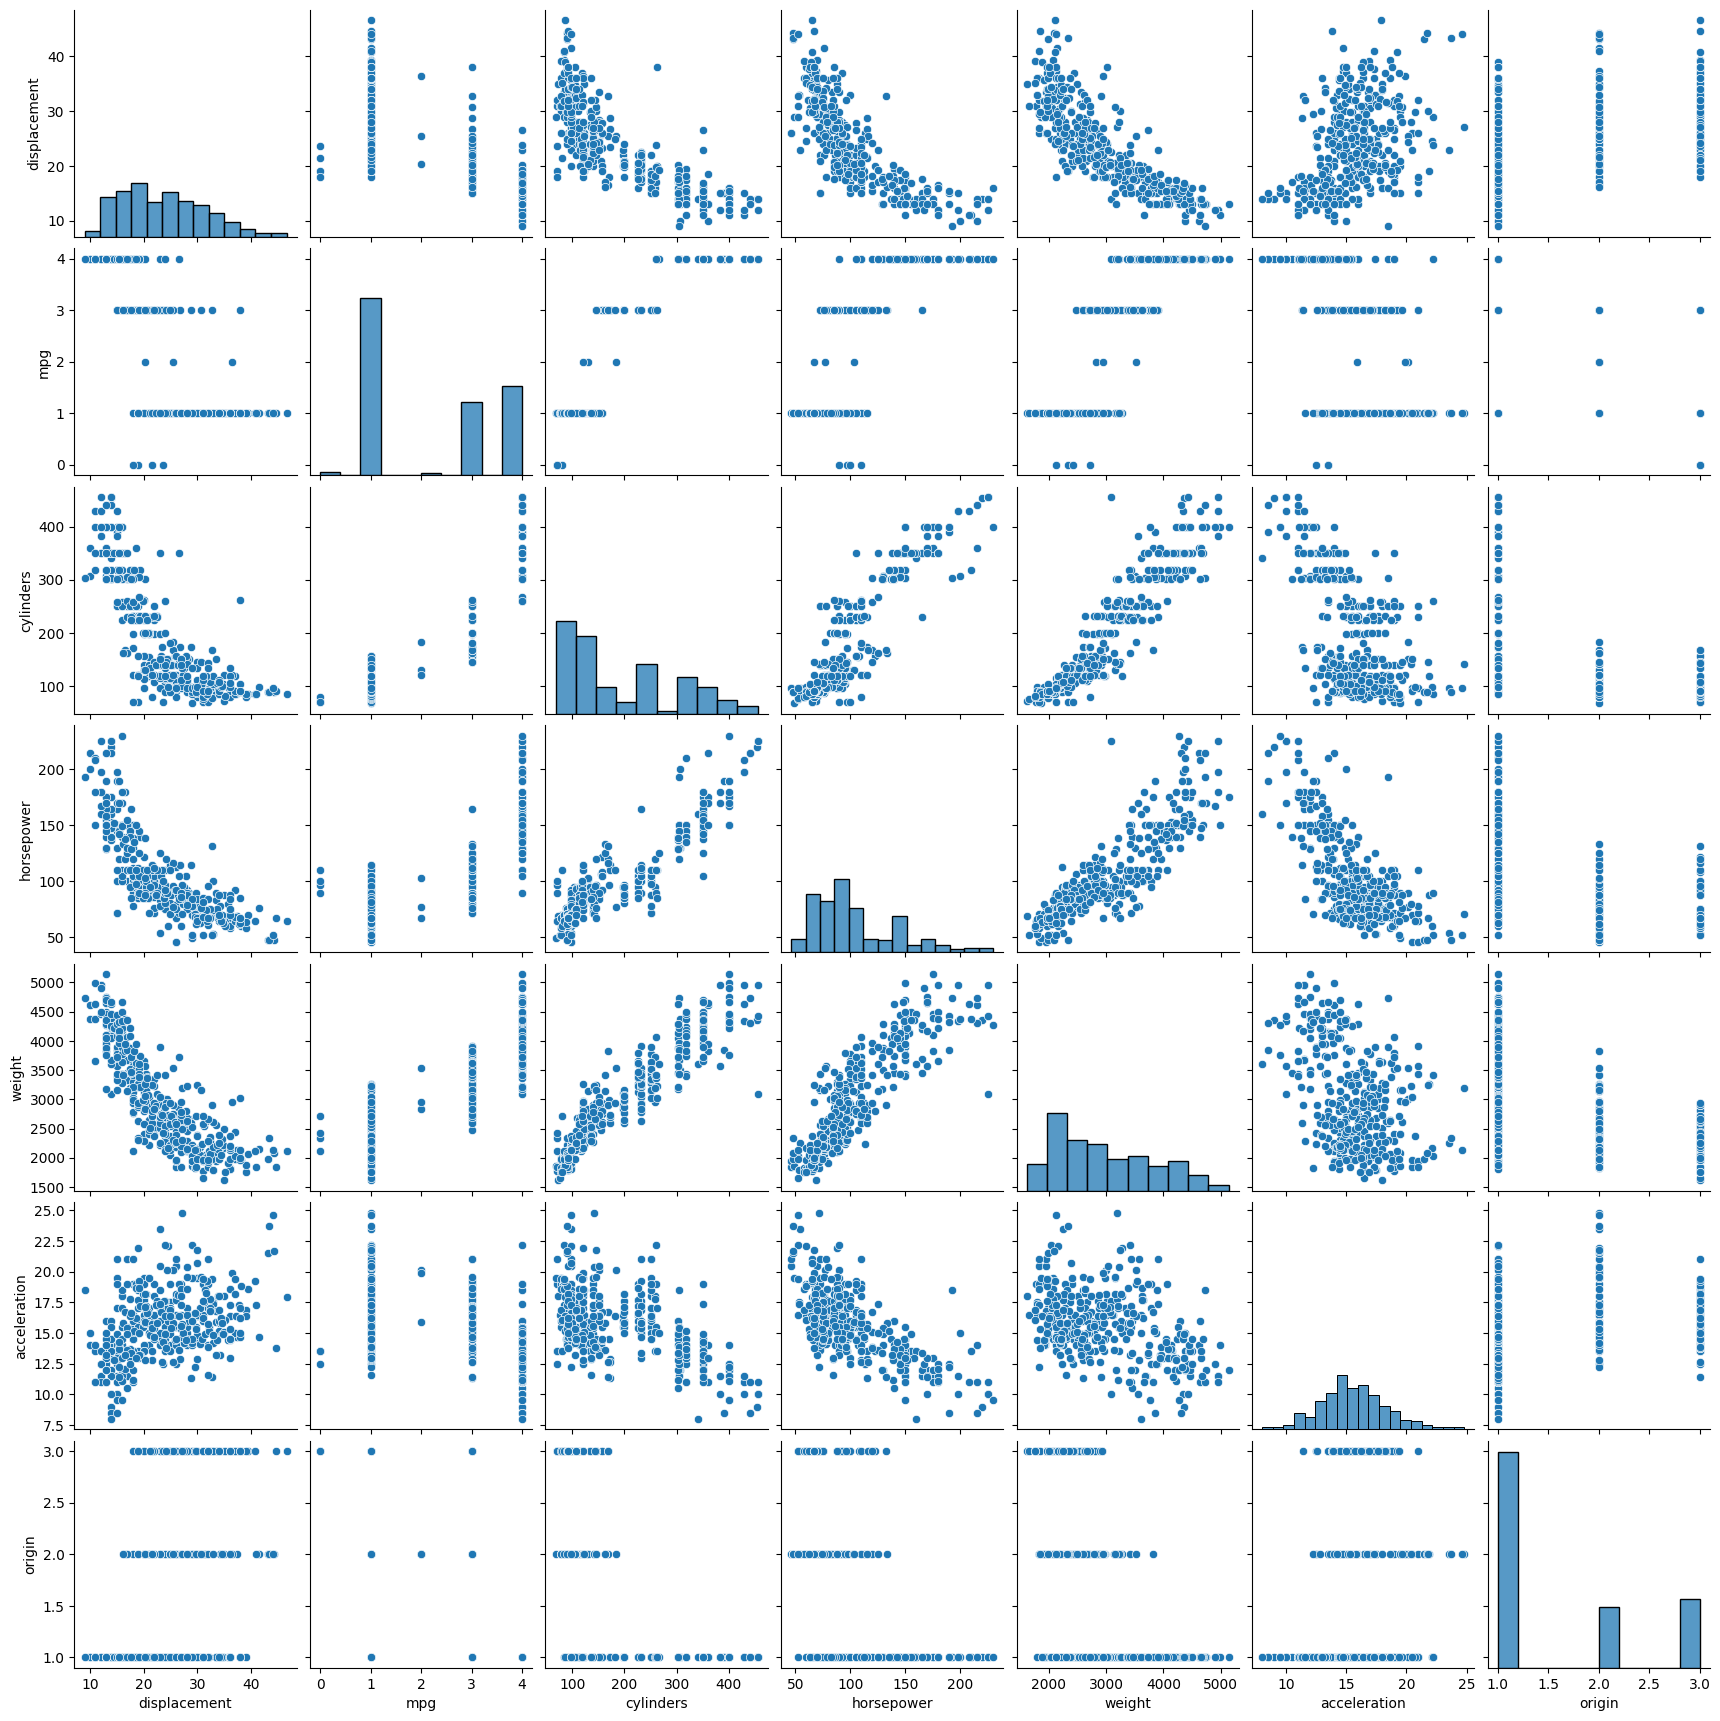

In [43]:
sns.pairplot(dataset)
plt.show();

/home/kelmith/Kelmith/Projects/ML_class/venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


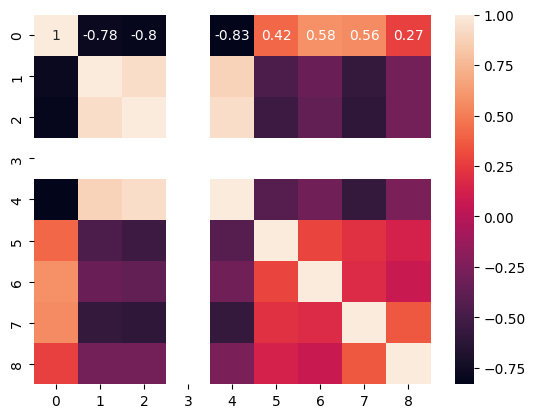

In [27]:
corr = np.corrcoef(dataset.values.T)
heatmap = sns.heatmap(corr,annot=True)
plt.show()

In [9]:
dataset.drop(["model_year","car_name"],axis=1,inplace=True)
target = dataset["mpg"]

features = dataset.drop("mpg",axis=1)
features.head()


,displacement,cylinders,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,1
1,15.0,350.0,165.0,3693.0,11.5,1
2,18.0,318.0,150.0,3436.0,11.0,1
3,16.0,304.0,150.0,3433.0,12.0,1
4,17.0,302.0,140.0,3449.0,10.5,1


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.15,random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)

(333, 6)
(59, 6)


## Normalization

In [12]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train_std = scaller.fit_transform(x_train)
x_test_std =scaller.fit_transform(x_test)

In [20]:
x_test_std.shape

(59, 6)

In [13]:
pd.DataFrame(x_train_std).describe()

,0,1,2,3,4,5
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,-2.507170e-16,1.226913e-16,-9.601929e-17,-1.707010e-16,2.400482e-16,1.440289e-16
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-1.848011e+00,-1.206816e+00,-1.531795e+00,-1.635950e+00,-2.681131e+00,-6.940699e-01
25%,-8.250500e-01,-8.713573e-01,-7.273631e-01,-9.008801e-01,-7.102335e-01,-6.940699e-01
50%,-5.782953e-02,-4.304691e-01,-2.602735e-01,-1.860634e-01,-2.937784e-02,-6.940699e-01
75%,7.733260e-01,1.016795e+00,6.220069e-01,7.670255e-01,5.798088e-01,5.418941e-01
max,2.959904e+00,2.483227e+00,3.242898e+00,2.565981e+00,3.339066e+00,1.777858e+00


## Training

In [14]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [15]:
linear_reg.fit(x_train_std,y_train)

LinearRegression()

In [24]:
train_results = linear_reg.predict(x_train_std)
test_results = linear_reg.predict(x_test_std)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
print("Training results: ")
print("MSE : ",mean_squared_error(y_train,train_results))
print("R2 Score: ", r2_score(y_train,train_results))

Training results: 
MSE :  0.2738997045933161
R2 Score:  0.9130426969256853


In [26]:
print("Testing Results:")
print("MSE : ", mean_squared_error(y_test,test_results))
print("R2 Score: ",r2_score(y_test,test_results))

Testing Results:
MSE :  0.2506049021664822
R2 Score:  0.9130426969256853
